# Member Fitness First

### Gym Member Exploration Data Analysis and Machine Learning Regression Algorithm to Predict Calories Burned in a Workout Routine 

## By: Janine Par 


In [329]:
# Export Libraries required for this project 
import numpy as np  
import pandas as pd  
import numpy as np  

#import json
import datetime
import re
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 800)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


# GYM Member Data Preparation and Exploration Data Analysis

### Load the Member Data from Kaggle and Analyze the structure of the dataset

In [264]:
gym_df=pd.read_csv('gym_members_exercise.csv',  encoding='latin-1')  

### Determine the structure of the dataset: Record count and snapshot of data
* 973 records 
* 15 columns

In [266]:
gym_df.shape

(973, 15)

In [268]:
gym_df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808,Cardio,29.7,2.7,3,1,30.07


### Determine the column  and datatypes;

In [269]:
gym_df.columns.tolist() 

['Age',
 'Gender',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Workout_Type',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

In [270]:
gym_df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                    int64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

### Identify the categorical variables 

In [276]:
gym_df_cat = gym_df.select_dtypes(exclude=np.number)
gym_df_cat.head ()
gym_df_cat.columns.tolist()

['Gender', 'Workout_Type']

### Identify the numeric variables

In [278]:
gym_df_num = gym_df.select_dtypes(include=np.number)
gym_df_num.head ()
gym_df_num.columns.tolist()

['Age',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

### Determine Missing columns or Duplicated rows

In [6]:
#This function will determining missing rows
def df_missing_cols (df, name):
    for c in df.columns:
            is_missing=df[c].isna().sum()
            if is_missing > 0:
                print ("dataframe {} column {} has {} missing values (s)". format (name,c,is_missing))


In [7]:
df_missing_cols(gym_df,'gym_members')

No null columns has been identified in the dataset. 
No duplicated records has been identified in the dataset.
It appears that the data from Kaggle is already clean and ready for Exploration Data Analysis


In [39]:
gym_df.duplicated().sum()

0

### Look into the statistical description of data
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [9]:
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


#### Insight:

- Age: from 18 to 59 Mean of  38. 
- Weight(kg): from 40 to 129.9 Mean of 73.8
- Height(m) ranges from 1.5 to 2.0 Mean of  1.72
- Max BPM ranges from 160 to 199 Mean of  179.88
- Session Duration(hours) ranges from 0.5 to 2 Mean of 1.2
- Fat Percentage ranges from 10 to 35 Mean of  24.9
- Water Intake(liters) ranges from 1.5 to 3.7 Mean of  2.6
- Workout Frequency(days/week) ranges from 2 to 5 Mean of  3.3
- Experience Level ranges from 1 to 3 Mean of  1.8
- BMI ranges from 12.3 to 49.8 Mean of  24.9
- Calories Burned ranges 303 to 1783 Mean of 905


### Let's Look into the Correlation Matrix

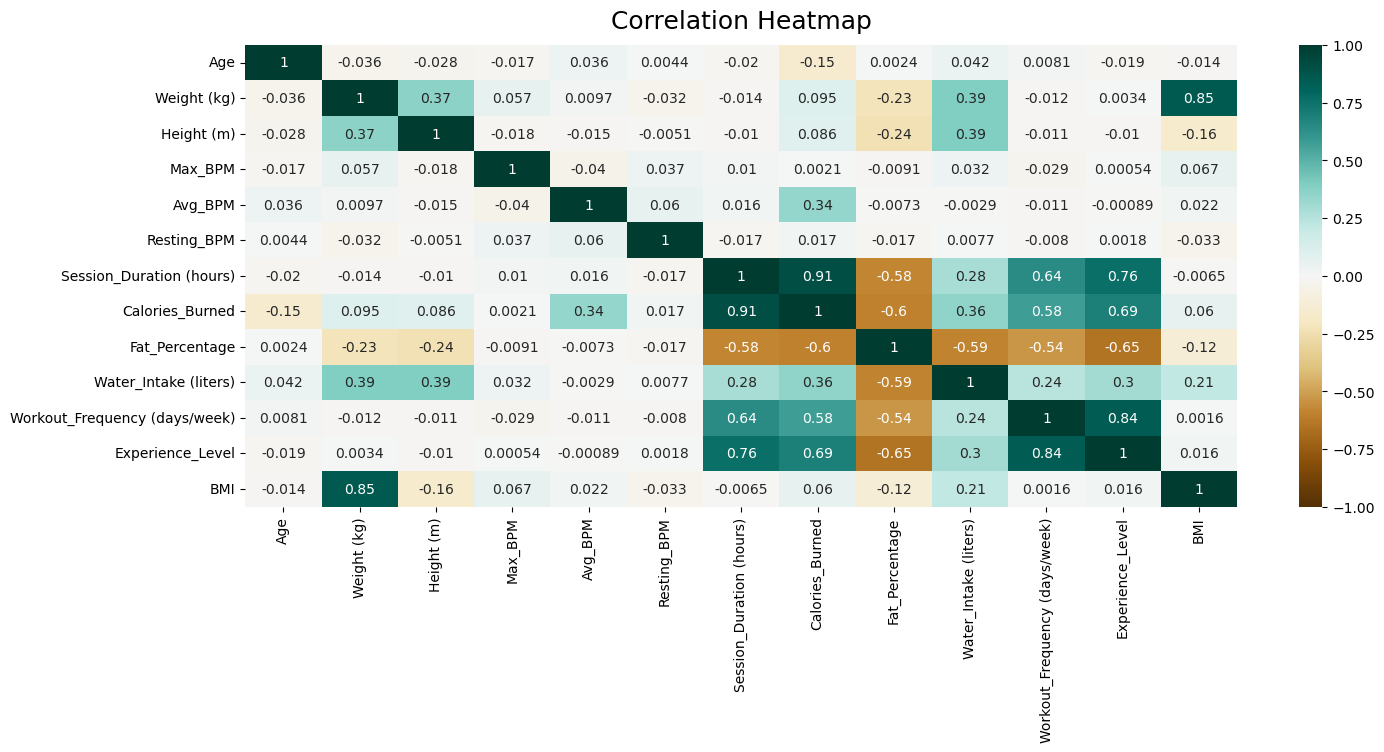

In [280]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(gym_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Let's see any variables that have high correlation and consider removing them to avoid Multicollinearity

In [281]:
# Create correlation matrix
corr_matrix = gym_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
to_drop
#df_als.drop(to_drop, axis=1, inplace=True)


[]

No Identified correlation higher that 0.95

### Correlation Insight:

* Burned Calories and Session Duration shows high correlation which shows that Longer workout sessions are highly effective for burning calories.

* Fat Percentage has negative correlation with Workout Frequency and Burned Calories indicates that Gym Members that goes to gym and attends workout sessions has lower percentage of body fat. 

* Experience Level and Workout Frequency shows positive correlation shows how experienced members goes the the gym frequently. 

* Weight and BMI have strong positive correlation and can be explained because weight, along with height, are variables used to calculate BMI.

### Feature Engineering

#### Age Range Group
Create Age Ranges bins : 'Under 18', '18-28', '29-38', '39-48', '49-59', '60+'  using cut() Method: Bin Values into Discrete Intervals

In [286]:
gym_df['age_range'] = pd.cut(x=gym_df['Age'],   bins=[0,17, 28, 38, 48, 59, 69],labels = ['Under 18', '18-28', '29-38', '39-48', '49-59', '60+'])


In [292]:
gym_df.sort_values(by=['Age'], ascending=True). head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,age_range,BMI_Group
884,18,Male,114.5,1.97,192,128,60,1.03,725,Cardio,24.1,2.6,3,1,29.50,18-28,Overweight
403,18,Female,67.4,1.60,182,164,71,0.60,492,Strength,33.5,2.4,3,1,26.33,18-28,Overweight
687,18,Male,125.9,1.67,172,153,60,1.46,1229,Yoga,20.6,2.2,3,2,45.14,18-28,Very Obese
459,18,Male,62.0,1.85,161,121,53,0.88,586,Strength,23.7,3.0,3,1,18.12,18-28,Underweight
242,18,Female,60.9,1.79,191,126,69,1.11,699,Cardio,31.1,2.1,2,1,19.01,18-28,Healthy


#### BMI Group
Group gym members based on their BMI : Underweight,Healthy, Overweight,Obese, Very Obese

In [289]:
gym_df['BMI_Group'] = None
for i in range(len(gym_df)):
    if gym_df['BMI'][i]<18.5:
        gym_df['BMI_Group'][i] = 'Underweight' 
    elif gym_df['BMI'][i]>=18.5 and gym_df['BMI'][i]<=24.9:
        gym_df['BMI_Group'][i] = 'Healthy'
    elif gym_df['BMI'][i]>=25 and gym_df['BMI'][i]<=29.9:
        gym_df['BMI_Group'][i] = 'Overweight'
    elif gym_df['BMI'][i]>=30 and gym_df['BMI'][i]<=39.9:
        gym_df['BMI_Group'][i] = 'Obese'
    else:
        gym_df['BMI_Group'][i] = 'Very Obese'

In [291]:
gym_df.sort_values(by=['BMI_Group'], ascending=True). head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,age_range,BMI_Group
225,57,Male,81.4,1.86,162,145,70,1.80,1292,Cardio,12.0,3.5,5,3,23.53,49-59,Healthy
623,45,Female,65.4,1.68,196,129,66,0.76,441,HIIT,35.0,2.6,3,1,23.17,39-48,Healthy
625,45,Female,58.2,1.70,168,160,53,0.95,684,Yoga,26.8,2.0,3,1,20.14,39-48,Healthy
289,47,Male,82.1,1.84,185,136,65,1.37,922,Strength,24.4,3.4,4,2,24.25,39-48,Healthy
628,25,Female,64.4,1.71,179,167,61,1.12,935,HIIT,27.1,1.8,3,1,22.02,18-28,Healthy


#### Fat Percentage Group 
Group gym members based on their fat percentage: Low, Athletes, Average, High

In [293]:
# Look at the range for Fat Percentage
gym_df['Fat_Percentage'].describe()

count    973.000000
mean      24.976773
std        6.259419
min       10.000000
25%       21.300000
50%       26.200000
75%       29.300000
max       35.000000
Name: Fat_Percentage, dtype: float64

In [327]:
gym_df['Fat_Percentage_group'] = None
for i in range(len(gym_df)):
    if gym_df['Fat_Percentage'][i]<14:
        gym_df['Fat_Percentage_group'][i] = 'Low' 
    elif gym_df['Fat_Percentage'][i]>=14 and gym_df['Fat_Percentage'][i]<=20:
        gym_df['Fat_Percentage_group'][i] = 'Athletes'
    elif gym_df['Fat_Percentage'][i]>=21 and gym_df['Fat_Percentage'][i]<=29:
        gym_df['Fat_Percentage_group'][i] = 'Average'
    else:
        gym_df['Fat_Percentage_group'][i] = 'High'

#### Label Encoding
Converting Categorical columns into numerical ones using label encoding, a technique for machine learning pre-processing

In [296]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the Gender column
gym_df['Gender_Encoded'] = le.fit_transform(gym_df['Gender'])

# Apply Label Encoding to the Workout_Type column
gym_df['Workout_Type_Encoded'] = le.fit_transform(gym_df['Workout_Type'])

# Show the updated dataframe
gym_df[['Gender', 'Gender_Encoded', 'Workout_Type', 'Workout_Type_Encoded']].head()

,Gender,Gender_Encoded,Workout_Type,Workout_Type_Encoded
0,Male,1,Yoga,3
1,Female,0,HIIT,1
2,Female,0,Cardio,0
3,Male,1,Strength,2
4,Male,1,Strength,2


## Data Exploration and Visualization
Analyzed variables in the dataset and create visualization to uncover valuable insights from our datasets

These are functions used to generate percentage on the Bar Graph

In [307]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()    

### Member Gender Distribution

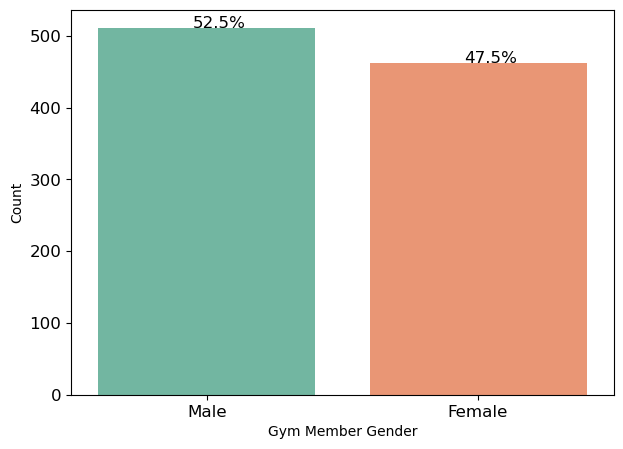

In [308]:
plt.figure(figsize =(7,5))
# count plot on two categorical variable
ax=sns.countplot(x ='Gender', data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member Gender')
plt.yticks(size=12)
plt.ylabel('Count')

without_hue (ax,gym_df.Gender)

Our dataset reveals that male members constitute a slightly higher percentage compared to female members. However, despite this distribution, the difference in representation between the two genders appears to be relatively minor and does not suggest a significant imbalance.

### Gym Popular Workout Type

In [309]:
total = gym_df['Workout_Type'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

Text(0.5, 0, 'Workout Types')

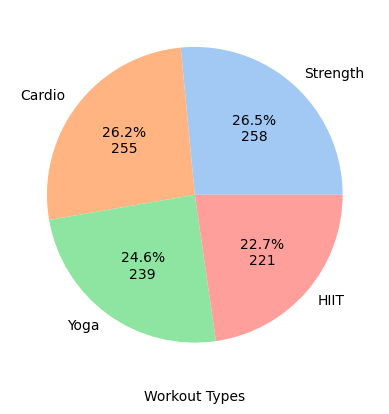

In [314]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.pie(gym_df['Workout_Type'].value_counts().values, labels=gym_df['Workout_Type'].value_counts().index, colors = colors, autopct=fmt)
plt.xlabel('Workout Types')


This dataset has four workout type and the graph indicates that strenght is the most popular.

Text(0, 0.5, 'Count')

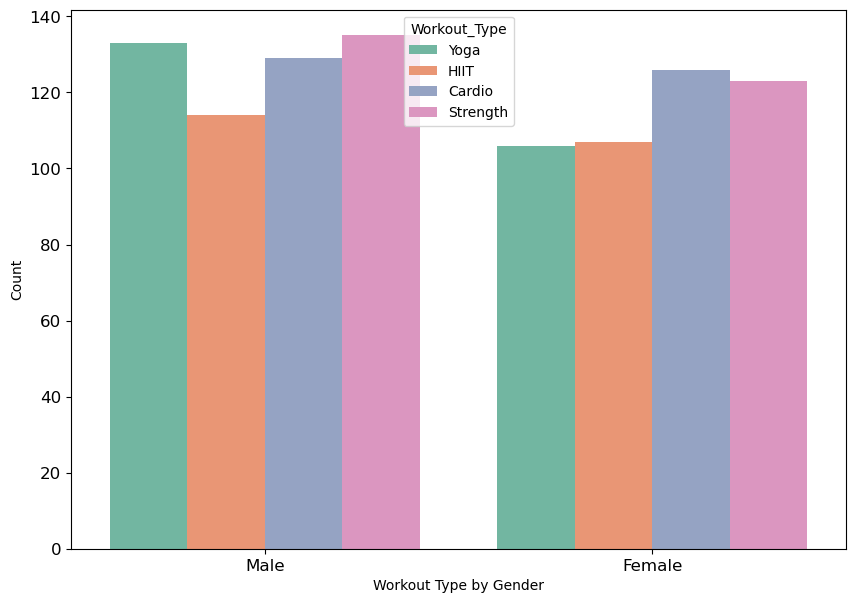

In [326]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='Gender', hue = 'Workout_Type',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Workout Type by Gender')
plt.yticks(size=12)
plt.ylabel('Count')

Male Gym Mmber shows more attendance to Strenght training while Female Members are into Cardio. 

Yoga seem to be more prefer by Male Gym Member than Female in this facility. 

HIIT workout type seem to be less favorable 

Text(0, 0.5, 'Count')

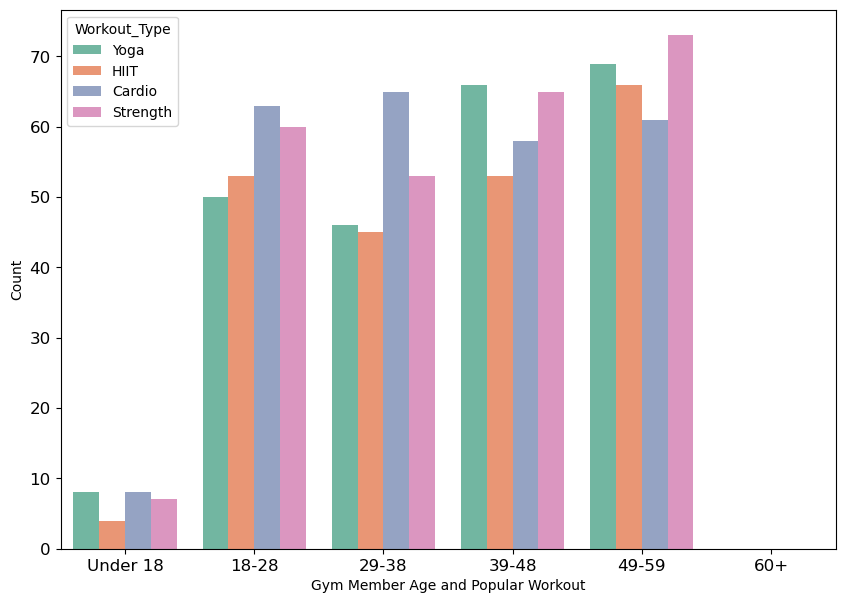

In [116]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='age_range', hue = 'Workout_Type',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member Age and Popular Workout')
plt.yticks(size=12)
plt.ylabel('Count')

Cardio seems to be popular for 18-28 and 29-38 Age Group 
while Strength are for older group. HIIT to seem to be not as popular compare to other workout type in this facility

Text(0, 0.5, 'Count')

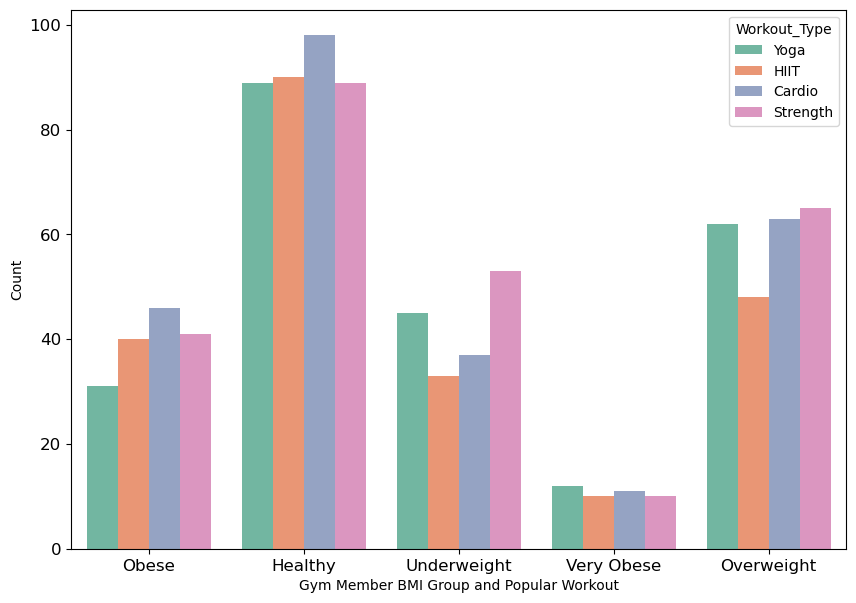

In [322]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='Experience', hue = 'Workout_Type',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member BMI Group and Popular Workout')
plt.yticks(size=12)
plt.ylabel('Count')

Focusing on Healthy Gym Members, the data shows that they have a stronger preference for Cardio followed by HITT


Text(0, 0.5, 'Count')

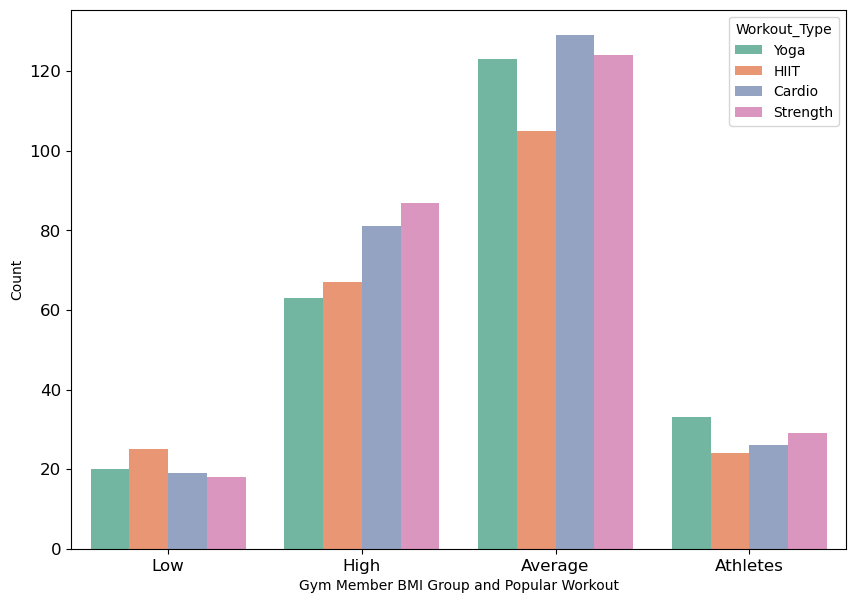

In [328]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='Fat_Percentage_group', hue = 'Workout_Type',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member BMI Group and Popular Workout')
plt.yticks(size=12)
plt.ylabel('Count')

Focusing on Average Gym Members, the data shows that they have a stronger preference for Cardio followed by Strength


### Member's Experience Level

Text(0.5, 0, 'Gym Member Experience Level')

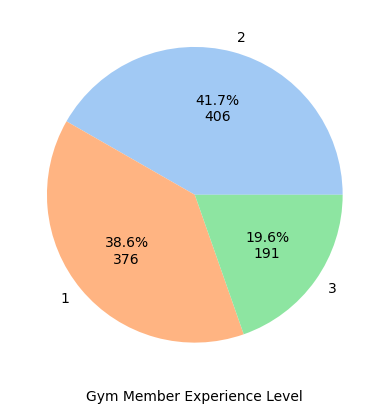

In [331]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.pie(gym_df['Experience_Level'].value_counts().values, labels=gym_df['Experience_Level'].value_counts().index, colors = colors, autopct=fmt)
plt.xlabel('Gym Member Experience Level')


Text(0, 0.5, 'Count')

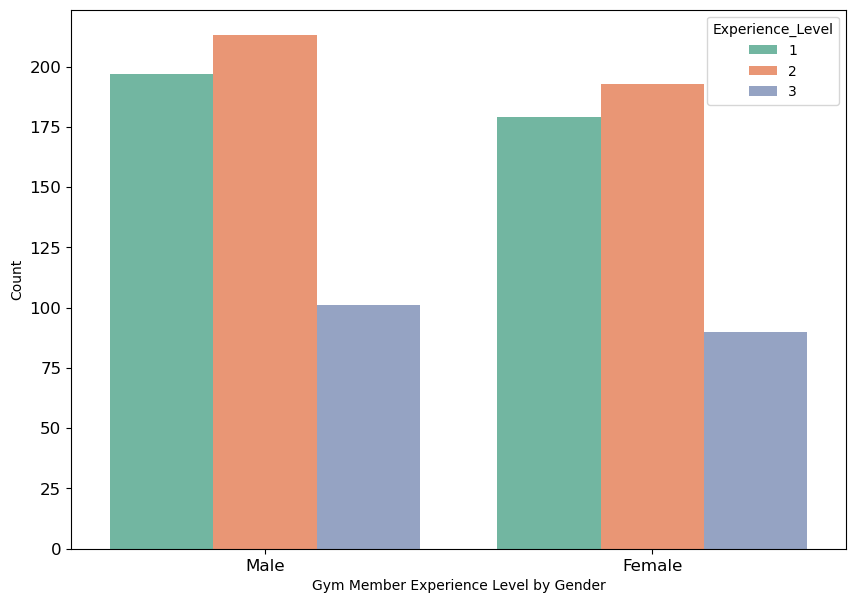

In [332]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='Gender', hue = 'Experience_Level',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member Experience Level by Gender')
plt.yticks(size=12)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

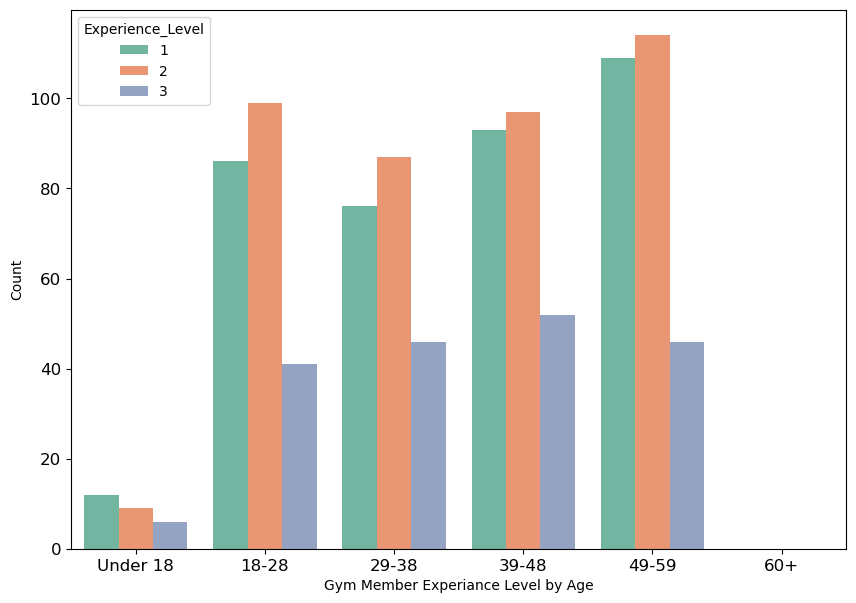

In [113]:
plt.figure(figsize =(10,7))
ax=sns.countplot(x ='age_range', hue = 'Experience_Level',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member Experiance Level by Age')
plt.yticks(size=12)
plt.ylabel('Count')

Observation

Most of the Gym Members in this dataset has Mid-Level Gym Experience. 

The age group of 49-59 has the highest level of Level 1-Level 2 Experience Level while 

The age group of 39-48 has the most experienced gym members. 

### Members BMI and Fat Percentage

Text(0, 0.5, 'Count')

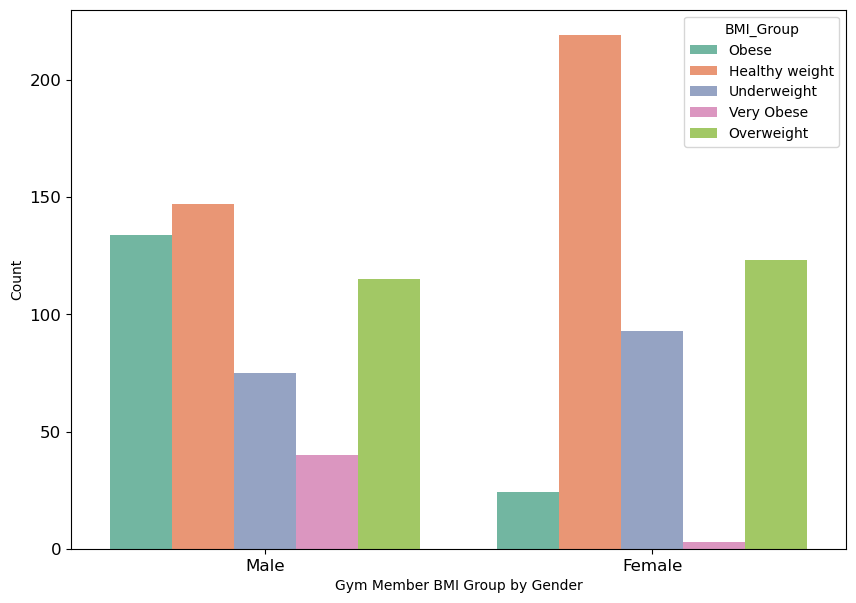

In [114]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='Gender', hue = 'BMI_Group',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member BMI Group by Gender')
plt.yticks(size=12)
plt.ylabel('Count')

Dataset shows that most of the Gender population has a Healthy BMI though Female populate seem to be healthier than Male.

Male population has more on the higher BMI than Female.


Text(0, 0.5, 'Count')

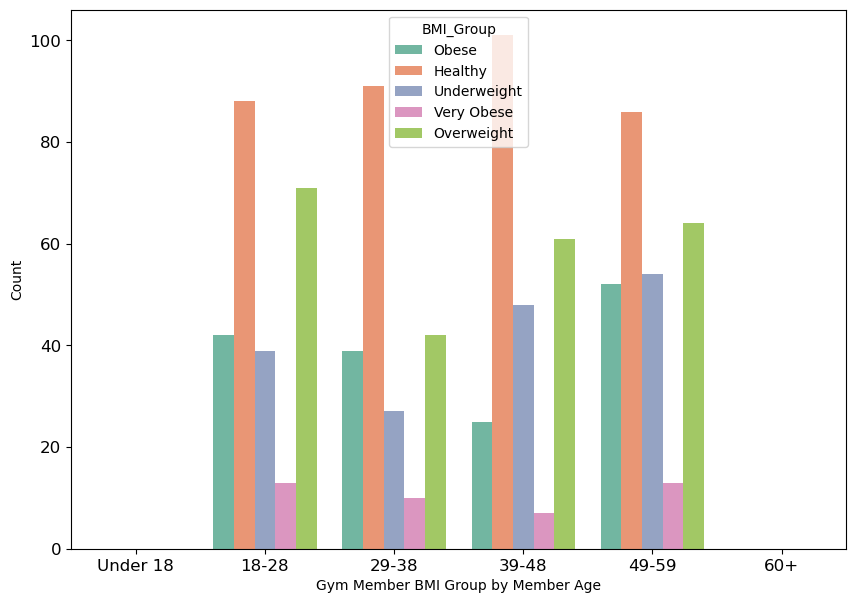

In [333]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='age_range', hue = 'BMI_Group',  data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member BMI Group by Member Age')
plt.yticks(size=12)
plt.ylabel('Count')


Age group of 39-48 has the highest healthy weight and on the other hand, the Age group 49-59 have more obesed members. 
Age group of 18-28 noticibly has more overweight in this dataset. 


Text(0, 0.5, 'Count')

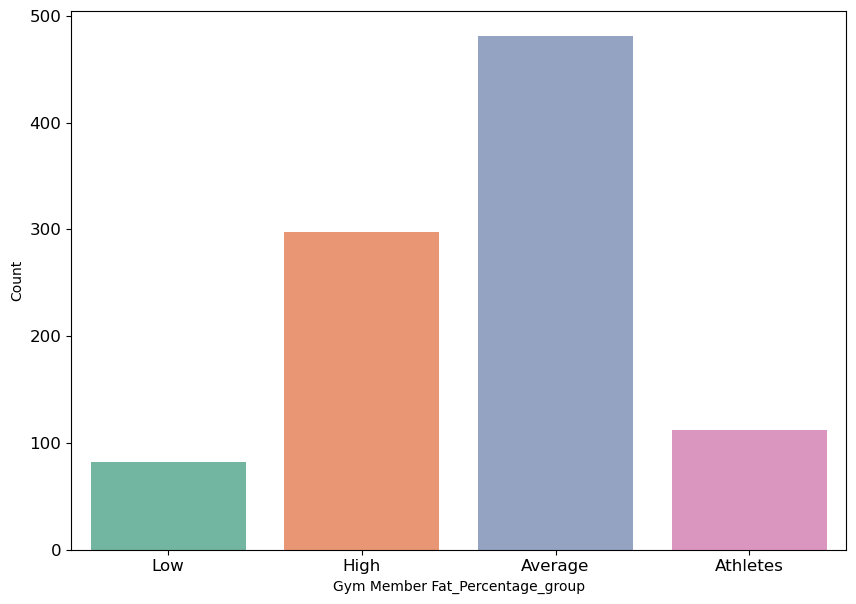

In [337]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='Fat_Percentage_group', data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member Fat_Percentage_group')
plt.yticks(size=12)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

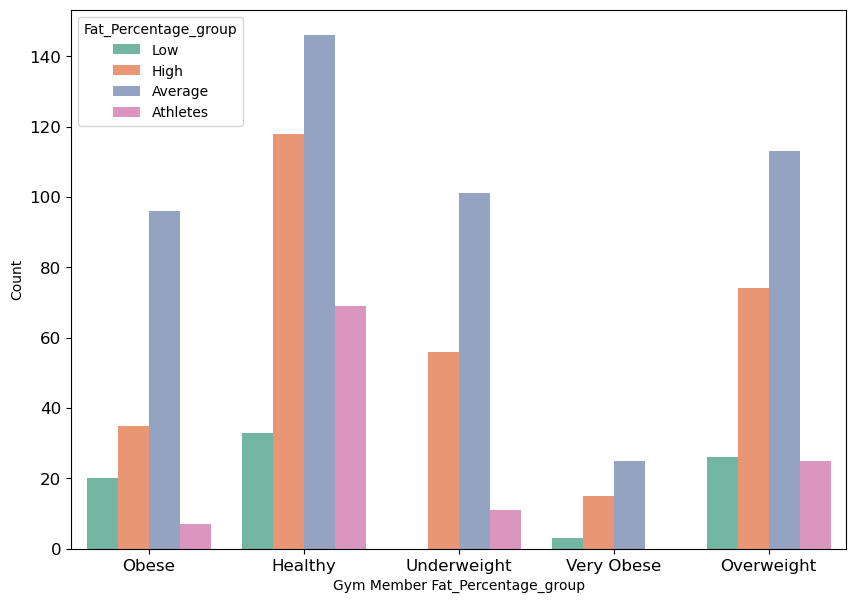

In [340]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='BMI_Group', hue = 'Fat_Percentage_group', data = gym_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gym Member Fat_Percentage_group')
plt.yticks(size=12)
plt.ylabel('Count')

Looking at overall member population, Most of the member with Average Fat has healthly BMI but we can also notice that many are High in fat percentage.



### Distribution Number data element

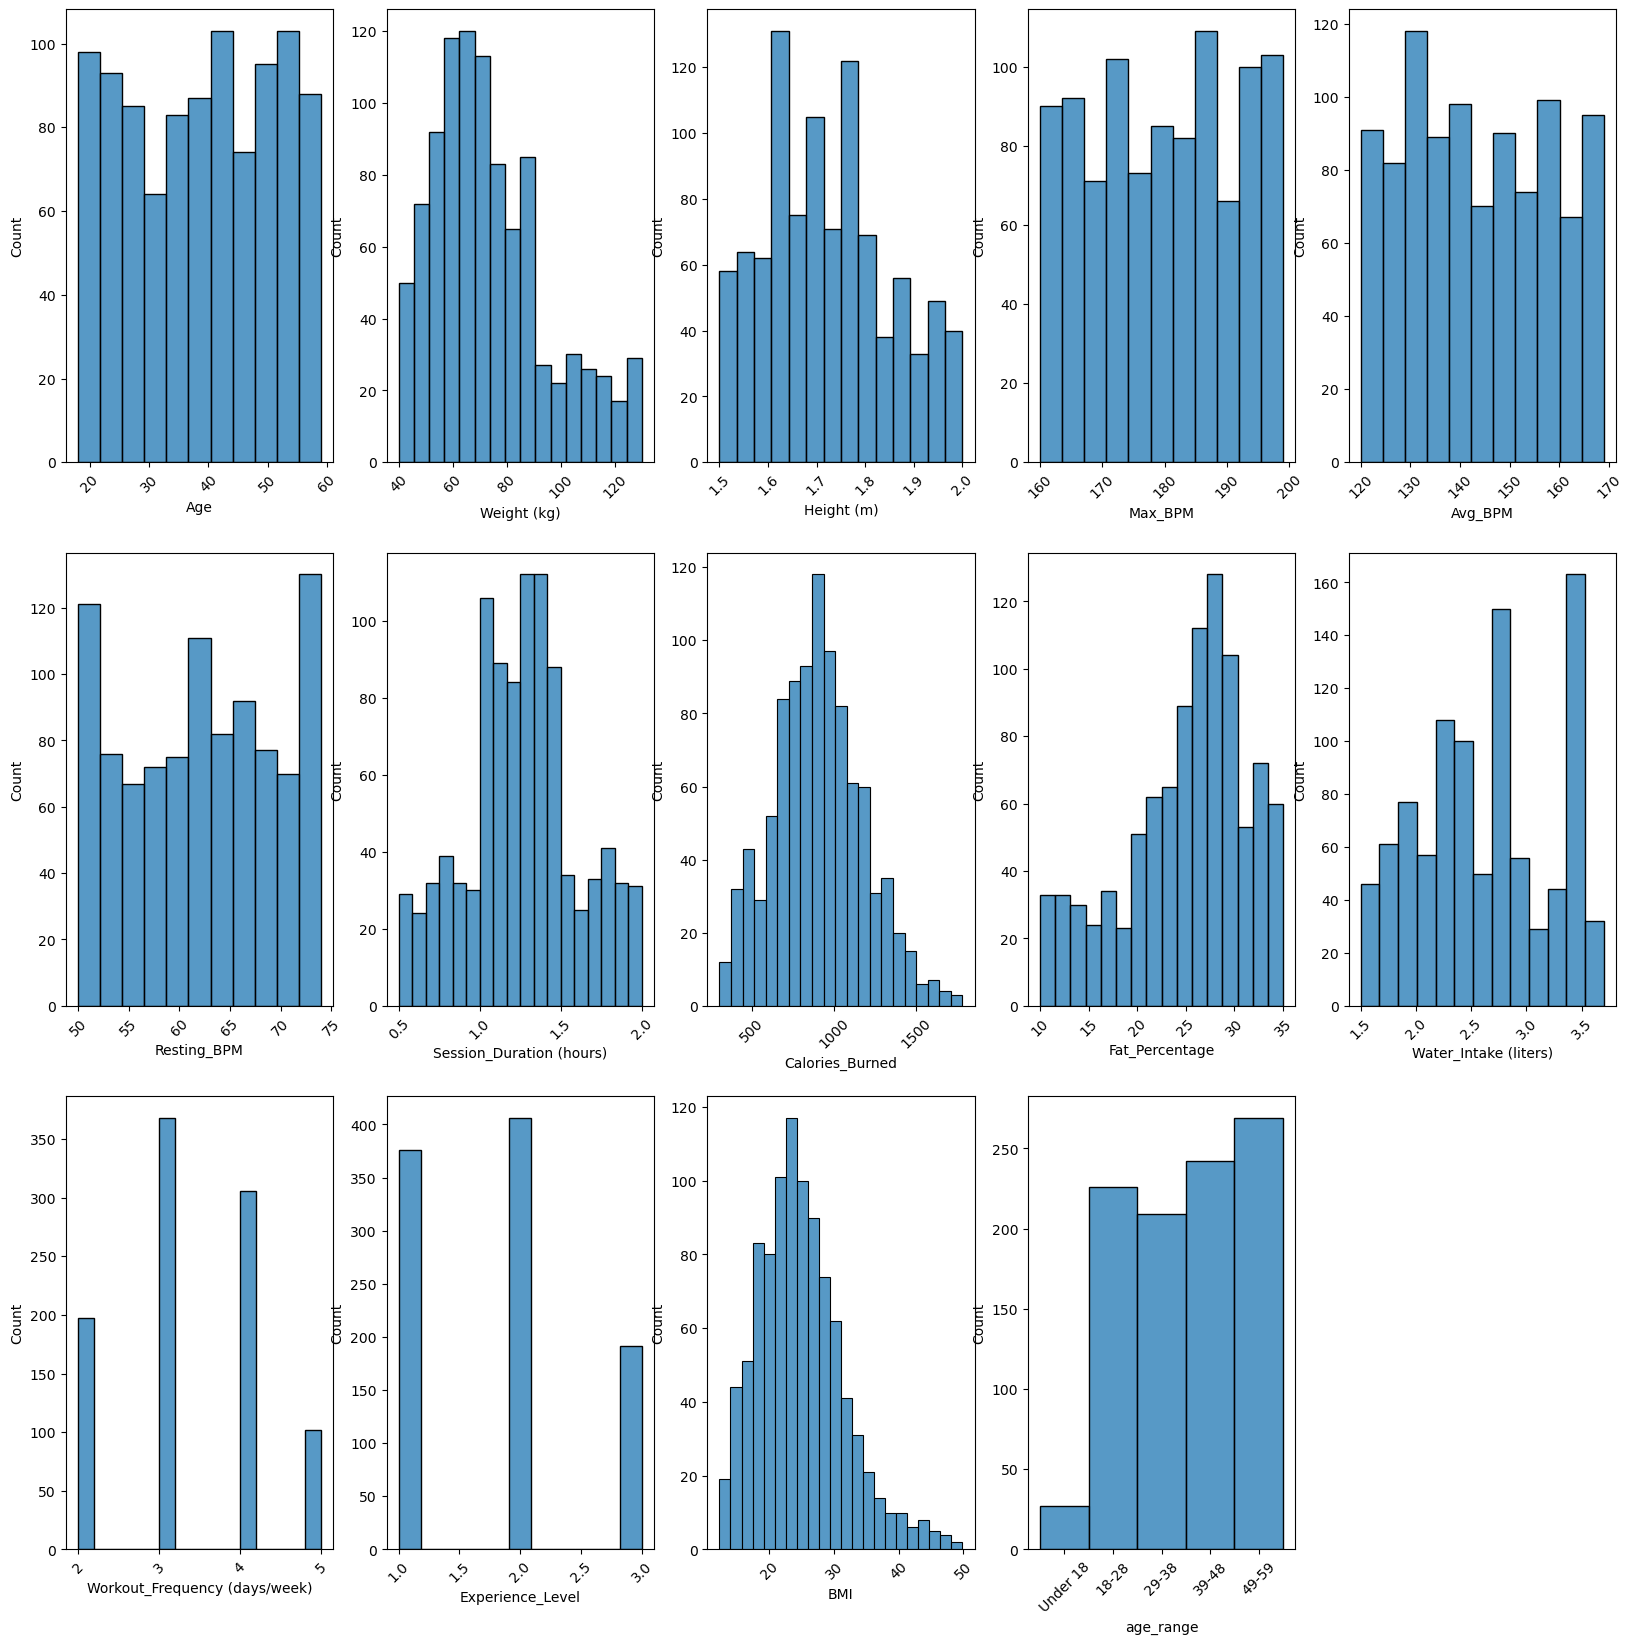

In [169]:
# Histogram of this dataset
plt.figure(figsize = (20, 20))
for i, col in enumerate(gym_df_num.columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(x = gym_df_num[col])
    plt.xticks(rotation = 45)
    plt.plot()   


## Prepare Data for Machine Learning Algorithm
### 1. Handle Outliers
Looking at individual features and identify extreme values using interquartile range (IQR). Difference betweek first and third quartile set of data

In [298]:
#Create a dataframe with all numeric dtypes
gym_df_cat = gym_df.select_dtypes(exclude=np.number)
gym_df_num = gym_df.select_dtypes(include=np.number)
gym_df_num.head ()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Encoded,Workout_Type_Encoded
0,56,88.3,1.71,180,157,60,1.69,1313,12.6,3.5,4,3,30.20,1,3
1,46,74.9,1.53,179,151,66,1.30,883,33.9,2.1,4,2,32.00,0,1
2,32,68.1,1.66,167,122,54,1.11,677,33.4,2.3,4,2,24.71,0,0
3,25,53.2,1.70,190,164,56,0.59,532,28.8,2.1,3,1,18.41,1,2
4,38,46.1,1.79,188,158,68,0.64,556,29.2,2.8,3,1,14.39,1,2


In [299]:
# Step 1: Calculate Q1, Q3, and IQR for each numeric column
for coll in gym_df_num.columns:
    if gym_df_num[coll].dtypes in ["int64", "float64"]:
        # Calculate Q1, Q3, and IQR
        Q1 = gym_df_num[coll].quantile(0.25)
        Q3 = gym_df_num[coll].quantile(0.75)
        IQR = Q3 - Q1
        
        # Step 2: Determine the bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Step 3: Identify the outliers
        outliers = gym_df_num[(gym_df_num[coll] < lower_bound) | (gym_df_num[coll] > upper_bound)]
        
        # Print the column name and outliers only if there are outliers
        if not outliers.empty:
            print(f"Outliers in {coll} is:", len(outliers[coll]))
            
        # Step 4: Filter the DataFrame to remove outliers
        gym_df_num_no_outlier = gym_df_num[(gym_df_num[coll] >= lower_bound) & (gym_df_num[coll] <= upper_bound)]        

Outliers in Weight (kg) is: 9
Outliers in Calories_Burned is: 10
Outliers in BMI is: 25


In [302]:
# Clean Dataset without Outliers
gym_df_num_no_outlier.shape

(948, 15)

In [300]:
gym_df_num_no_outlier.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Encoded,Workout_Type_Encoded
0,56,88.3,1.71,180,157,60,1.69,1313,12.6,3.5,4,3,30.20,1,3
1,46,74.9,1.53,179,151,66,1.30,883,33.9,2.1,4,2,32.00,0,1
2,32,68.1,1.66,167,122,54,1.11,677,33.4,2.3,4,2,24.71,0,0
3,25,53.2,1.70,190,164,56,0.59,532,28.8,2.1,3,1,18.41,1,2
4,38,46.1,1.79,188,158,68,0.64,556,29.2,2.8,3,1,14.39,1,2


### 2. Apply a standard scalar to the data.
This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:


In [303]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_feature = scaler.fit_transform(gym_df_num_no_outlier.values)

Validate and view scaled dataset

In [304]:
gym_df_scaled = pd.DataFrame(scaled_feature, index=gym_df_num_no_outlier.index, columns=gym_df_num_no_outlier.columns)
gym_df_scaled.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Encoded,Workout_Type_Encoded
0,1.425413,0.786265,-0.112678,0.008251,0.928975,-0.303631,1.248441,1.488861,-1.962549,1.456731,0.736245,1.593218,0.983616,0.974996,1.338839
1,0.602709,0.115185,-1.512052,-0.078657,0.511366,0.512942,0.117881,-0.082618,1.409206,-0.865361,0.736245,0.250666,1.288489,-1.025645,-0.442522
2,-0.549077,-0.225362,-0.501393,-1.121551,-1.507079,-1.120204,-0.432904,-0.835466,1.330057,-0.533633,0.736245,0.250666,0.053751,-1.025645,-1.333202
3,-1.124970,-0.971563,-0.190421,0.877329,1.416186,-0.848013,-1.940318,-1.365384,0.601884,-0.865361,-0.352617,-1.091885,-1.013306,0.974996,0.448159
4,-0.055454,-1.327134,0.509266,0.703514,0.998577,0.785133,-1.795374,-1.277673,0.665204,0.295685,-0.352617,-1.091885,-1.694191,0.974996,0.448159


## Perform Machine Learning Linear Regression Algorithm Model

In [342]:
## Call Libraries Needed 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Split the dataset to Training and Test Dataset (80/20)

In [343]:
X = gym_df_scaled.drop(columns=['Calories_Burned'])  # Features
y = gym_df_scaled['Calories_Burned']                  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train and Test with Linear Regression Model 

In [346]:
# Creating the Linear Regression Model
Linear_Model = LinearRegression()

# Fit the model on the training data
Linear_Model.fit(X_train, y_train) # Trains the linear regression model on the training data.

# Make predictions on the test data set
y_pred = Linear_Model.predict(X_test) # Generates predictions for the test data.


Evaluate and get the MSE and R²

In [347]:
# Evaluate the model performance
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE)", mse_linear) # Measures the average squared difference between predicted and actual values (the lower, the better)
print("R-squared (R²):", r2_linear) # Indicates how well the model explains the variance in the target variable (closer to 1 is better)

Mean Squared Error (MSE) 0.02083476205771035
R-squared (R²): 0.9801845389035733


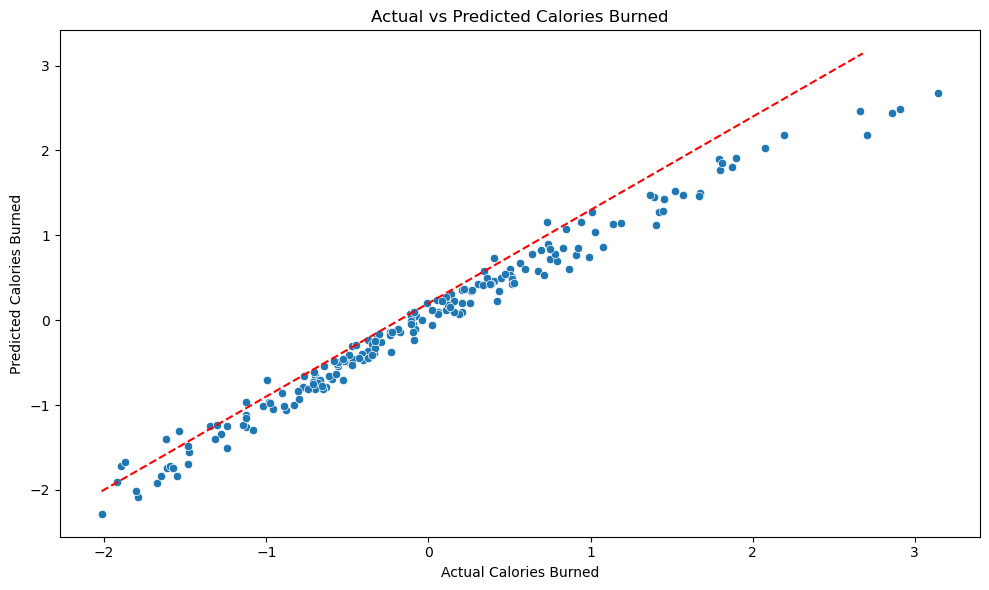

In [351]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Calories Burned")
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.tight_layout()
plt.show()

Determine the Variable importance using Regression Coefficients

In [348]:
Linear_Model.coef_

array([-0.15226638, -0.0710222 ,  0.04943334,  0.00327107,  0.32714809,
        0.00850541,  0.89801084, -0.01096635, -0.00310509,  0.00133259,
       -0.00174677,  0.07181432,  0.1510131 , -0.00921807])

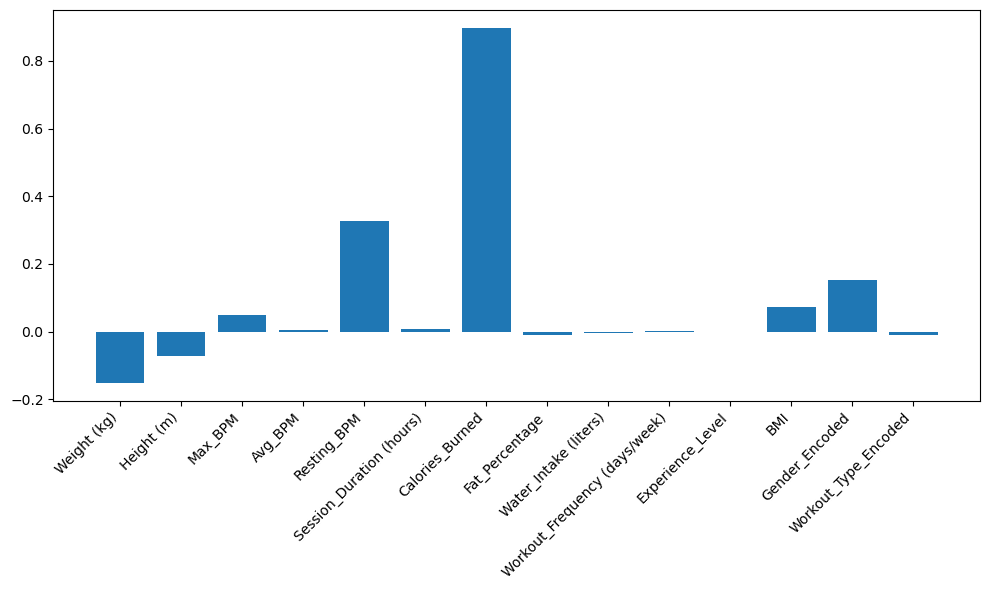

In [350]:
pyplot.figure(figsize=(10, 6))
pyplot.bar(coef_dict.keys(), coef_dict.values() )
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()

In [349]:
coef_dict={}
for coef, feat in zip (Linear_Model.coef_, gym_df_num.iloc[:,1:].columns):
    coef_dict[feat] = coef

dict(sorted(coef_dict.items(), key=lambda item: item[1],  reverse = True))

{'Calories_Burned': 0.8980108431286585,
 'Resting_BPM': 0.3271480936991699,
 'Gender_Encoded': 0.1510130957637805,
 'BMI': 0.0718143238018468,
 'Max_BPM': 0.04943334463127009,
 'Session_Duration (hours)': 0.008505412511875926,
 'Avg_BPM': 0.003271072999173113,
 'Workout_Frequency (days/week)': 0.0013325913426506346,
 'Experience_Level': -0.0017467693220484255,
 'Water_Intake (liters)': -0.0031050938048433068,
 'Workout_Type_Encoded': -0.009218074665704132,
 'Fat_Percentage': -0.010966352128312647,
 'Height (m)': -0.07102219690464183,
 'Weight (kg)': -0.15226637835736348}

## Comparing with Other Regression Algorithm to determine best fit

In [358]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# Dictionary of models with parameters to evaluate performance
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, min_samples_split=10),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    'XG Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


Linear Regression - MSE: 0.02083476205771035
Linear Regression - R²: 0.9801845389035733
Linear Regression - MAE: 0.11039479245077573



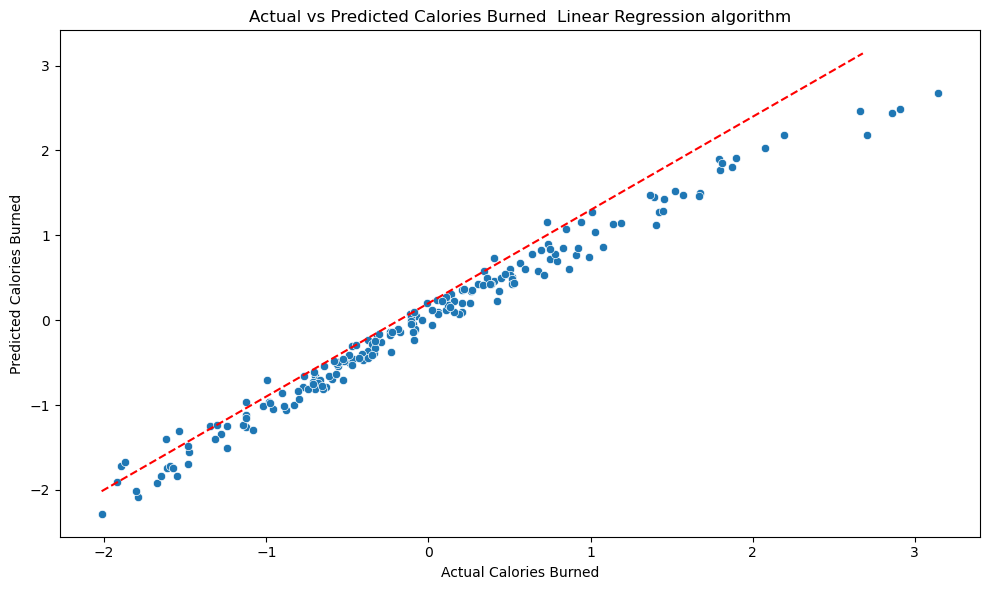

Decision Tree Regressor - MSE: 0.09332327823781854
Decision Tree Regressor - R²: 0.9112423850010732
Decision Tree Regressor - MAE: 0.2276441356669972



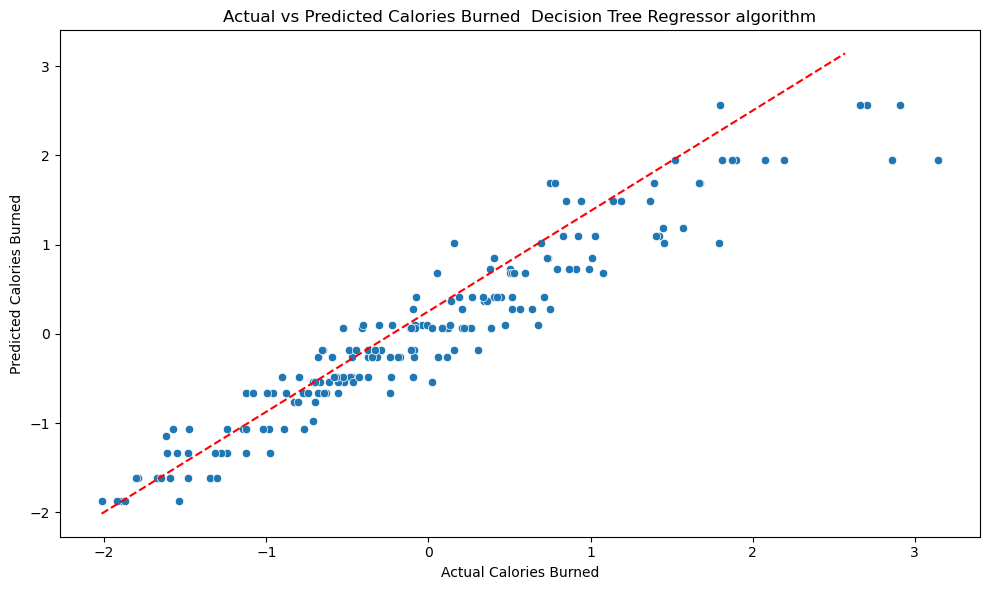

Random Forest Regressor - MSE: 0.044969879126599166
Random Forest Regressor - R²: 0.9572301863646977
Random Forest Regressor - MAE: 0.1623035327961557



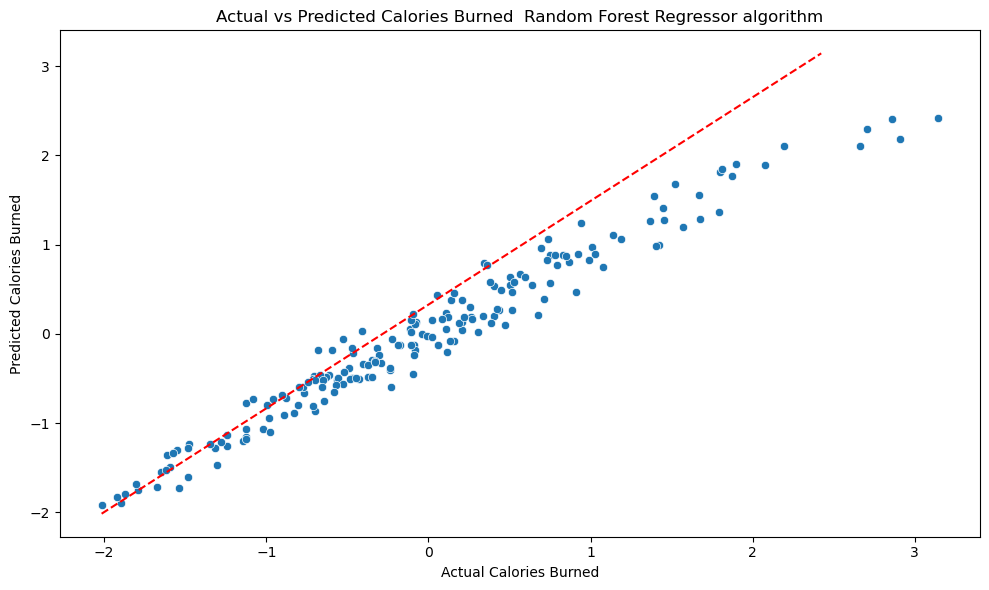

KNeighbors Regressor - MSE: 0.19497356636485788
KNeighbors Regressor - R²: 0.814565143175962
KNeighbors Regressor - MAE: 0.36171724455039234



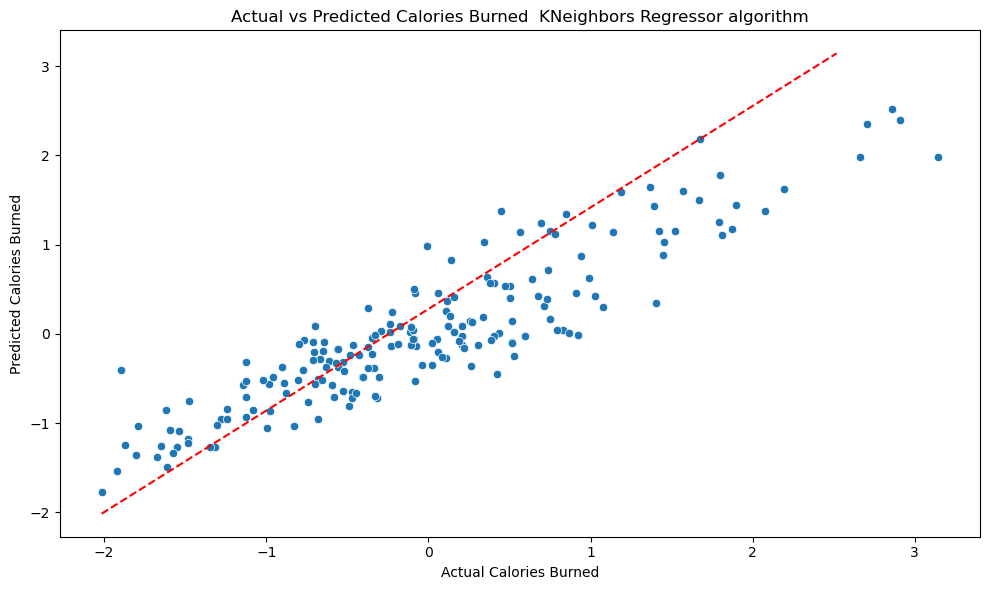

XG Regressor - MSE: 0.006632426989361395
XG Regressor - R²: 0.9936920518401627
XG Regressor - MAE: 0.06133909948116807



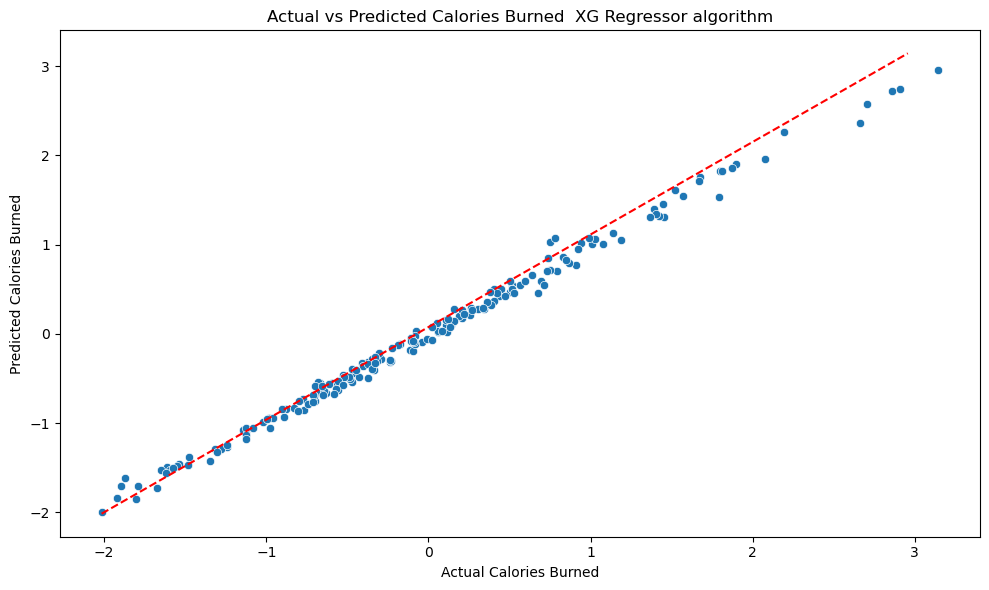

Best Model: XG Regressor with R² score of 0.9936920518401627


In [368]:

# Initialize variables to track the best model
best_model_name = None
best_model = None
best_r2_score = -float('inf')

# Train, predict, and evaluate each model
model_score = []
for name, model in models.items():
    model.fit(X_train, y_train)  

    # Make predictions from each model
    y_pred = model.predict(X_test)  

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics in the list
    model_score.append((name, mse, r2, mae))

    # Print the performance metrics
    print(f"{name} - MSE: {mse}")
    print(f"{name} - R²: {r2}")
    print(f"{name} - MAE: {mae}\n")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title("Actual vs Predicted Calories Burned  " + name + " algorithm")
    plt.xlabel('Actual Calories Burned')
    plt.ylabel('Predicted Calories Burned')
    plt.tight_layout()
    plt.show()   
    
    
    # Update the best model if current model's R² score is higher
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name
        best_model = model

print(f"Best Model: {best_model_name} with R² score of {best_r2_score}")

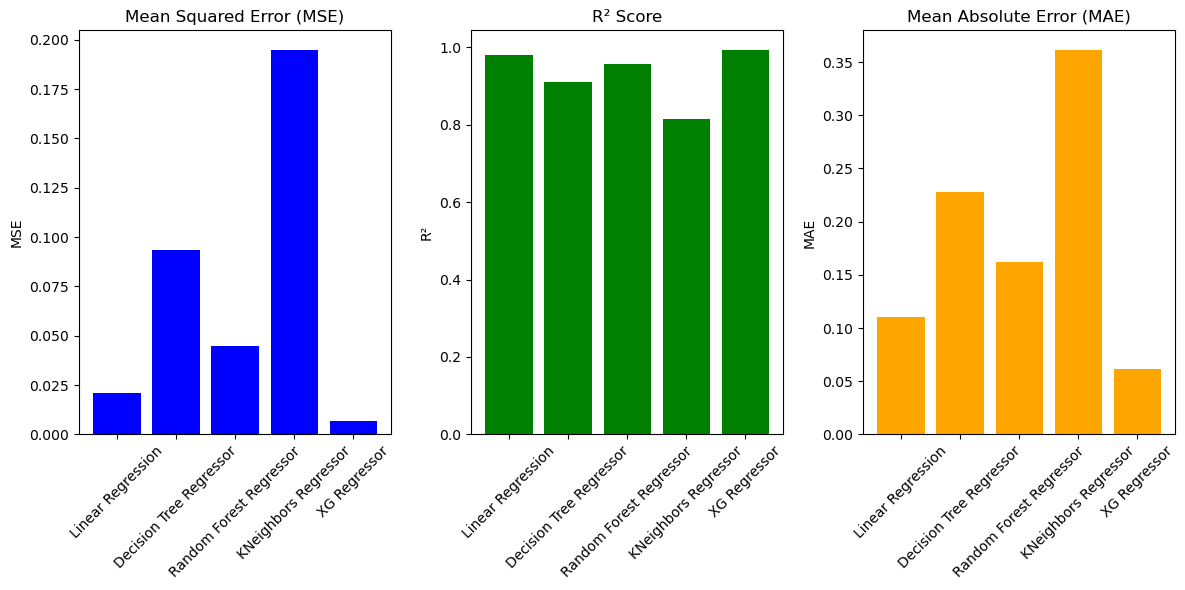

In [360]:
# Plotting the results
model_names = [score[0] for score in model_score]
mse_values = [score[1] for score in model_score]
r2_values = [score[2] for score in model_score]
mae_values = [score[3] for score in model_score]

x = range(len(model_names))

plt.figure(figsize=(12, 6))

# Create bar plots for each metric
plt.subplot(1, 3, 1)
plt.bar(x, mse_values, color='blue')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(x, r2_values, color='green')
plt.xticks(x, model_names, rotation=45)
plt.title('R² Score')
plt.ylabel('R²')

plt.subplot(1, 3, 3)
plt.bar(x, mae_values, color='orange')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

### Recommendation Next Step: Classification Nearest K-Means 

#### (Please note that while I attempted to implement a K-means clustering algorithm during this project, I was unable to fully complete this aspect. Therefore, it is presented as a recommendation for the next steps in this study.)


### Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.


In [60]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA


This loops through values of k (2-15)  and compute the silhouette coefficient:

In [61]:
range_n_clusters = list(range(2, 15))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(gym_df_scaled)
 cluster_labels = kmeans.labels_
 
 # silhouette score df_als_scaled features
 silhouette_avg.append(silhouette_score(gym_df_scaled, cluster_labels))


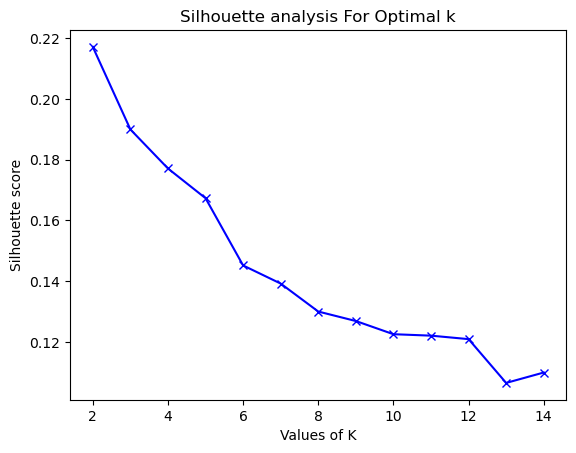

In [62]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

### Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

  
 Plotting the average silhouette scores for each k shows that the best choice for <b>  k is 3 </b>  since it has the highest silhouette score:


### Fit a K-means model to the data with the optimal number of clusters chosen


The Red and Blue clusters below seem to have overlap and the not clearly separated even when using the k = 2

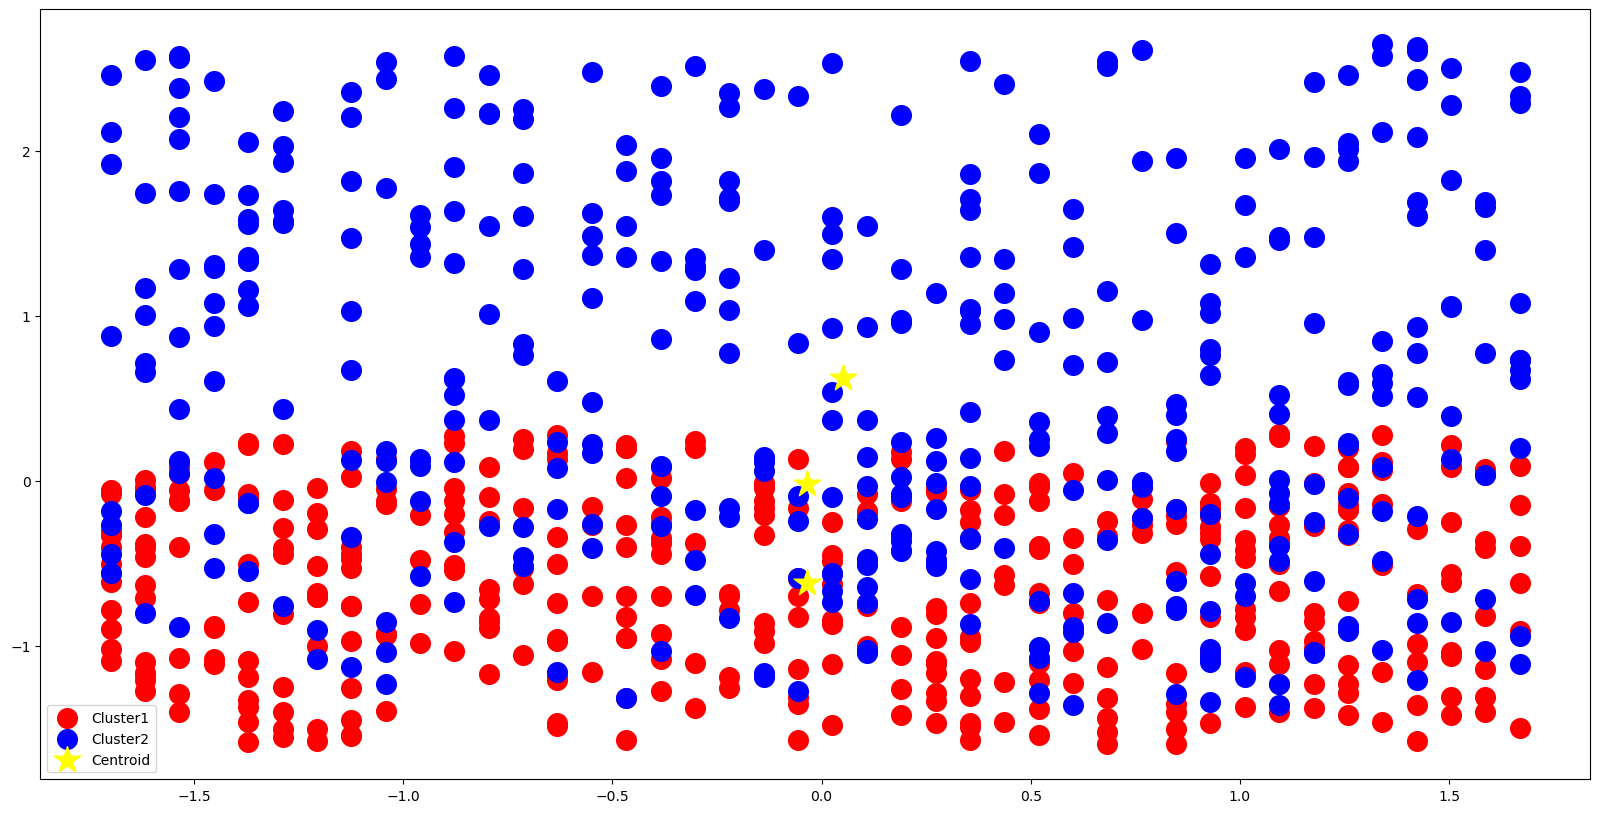

In [63]:
Kmeans = KMeans(n_clusters = 3,                 # Set to optimal cluster =2 
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_feature)

plt.figure(figsize = (20,10))

#Plot the clusters and centroids
plt.scatter(scaled_feature[y_Kmeans == 0, 0], 
            scaled_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_feature[y_Kmeans == 1, 0],
            scaled_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()

In [64]:
score = silhouette_score(scaled_feature, y_Kmeans, metric='euclidean')
print(score)

0.18992114344757827


### Fit a PCA transformation with two features to the scaled data.

Perform PCA with the chosen number of components=2


In [99]:
scaled_pca = PCA(n_components=2).fit(gym_df_scaled.values)
scaled_pca_feature = scaled_pca.transform(gym_df_scaled.values)

In [102]:
scaled_pca_feature

array([[ 3.75072916,  0.345011  ],
       [-0.77014709, -1.14297768],
       [-1.30344165, -0.96815231],
       ...,
       [ 1.8396793 , -1.98774611],
       [ 0.19837808,  2.57844467],
       [-1.56238324,  2.58459878]])

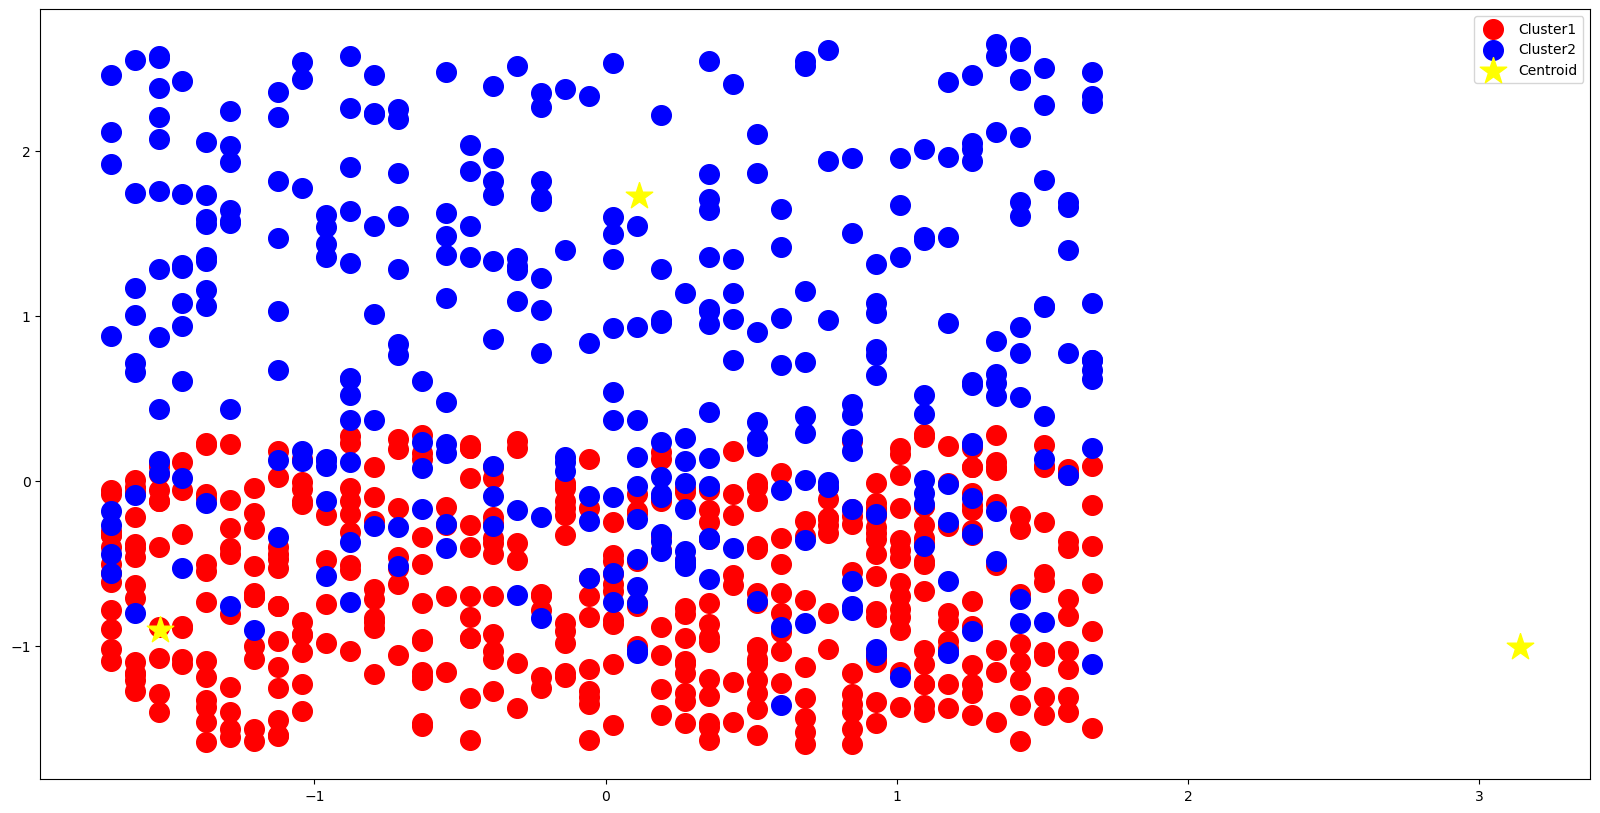

In [107]:
Kmeans = KMeans(n_clusters = 3,                 # Set to optimal cluster =2 
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_pca_feature)

plt.figure(figsize = (20,10))

#Plot the clusters and centroids
plt.scatter(scaled_feature[y_Kmeans == 0, 0], 
            scaled_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_feature[y_Kmeans == 1, 0],
            scaled_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()